# 1 Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import json
from zipfile import ZipFile


# 2 Load World GeoJSON

In [26]:
with ZipFile("/Users\VIDA\Downloads/World Happiness Report Analysis (2013-2023).zip", 'r') as zip_ref:
    zip_ref.extractall("/mnt/data/")
    extracted_files = zip_ref.namelist()

extracted_files

['World Happiness Report 2013.csv',
 'World Happiness Report 2015.csv',
 'World Happiness Report 2016.csv',
 'World Happiness Report 2017.csv',
 'World Happiness Report 2018.csv',
 'World Happiness Report 2019.csv',
 'World Happiness Report 2020.csv',
 'World Happiness Report 2021.csv',
 'World Happiness Report 2022.csv',
 'World Happiness Report 2023.csv',
 'WorldHappinessIndex2013-2023.csv']

# 3 Load Datasets

In [27]:
# Load the consolidated World Happiness Index into a DataFrame
happiness_index = pd.read_csv("/mnt/data/WorldHappinessIndex2013-2023.csv")

# Display the first few rows to understand its structure
happiness_index.head()


,Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143.0
1,Singapore,2013,6.546,30.0
2,Comoros,2013,3.851,149.0
3,Sierra Leone,2013,4.318,127.0
4,Congo,2013,NaN,NaN


# 4 Data Cleaning

In [28]:
# Checking for missing values
missing_values = happiness_index.isnull().sum()

# Checking for duplicates
duplicates = happiness_index.duplicated().sum()

# Checking data types
data_types = happiness_index.dtypes

missing_values, duplicates, data_types


(Country      0
 Year         0
 Index      147
 Rank       147
 dtype: int64,
 0,
 Country     object
 Year         int64
 Index      float64
 Rank       float64
 dtype: object)

# 5 Exploratory Data Analysis

C:\Users\VIDA\AppData\Local\Temp\ipykernel_2932\917841663.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=happiness_index, x='Year', y='Index', ci='sd')


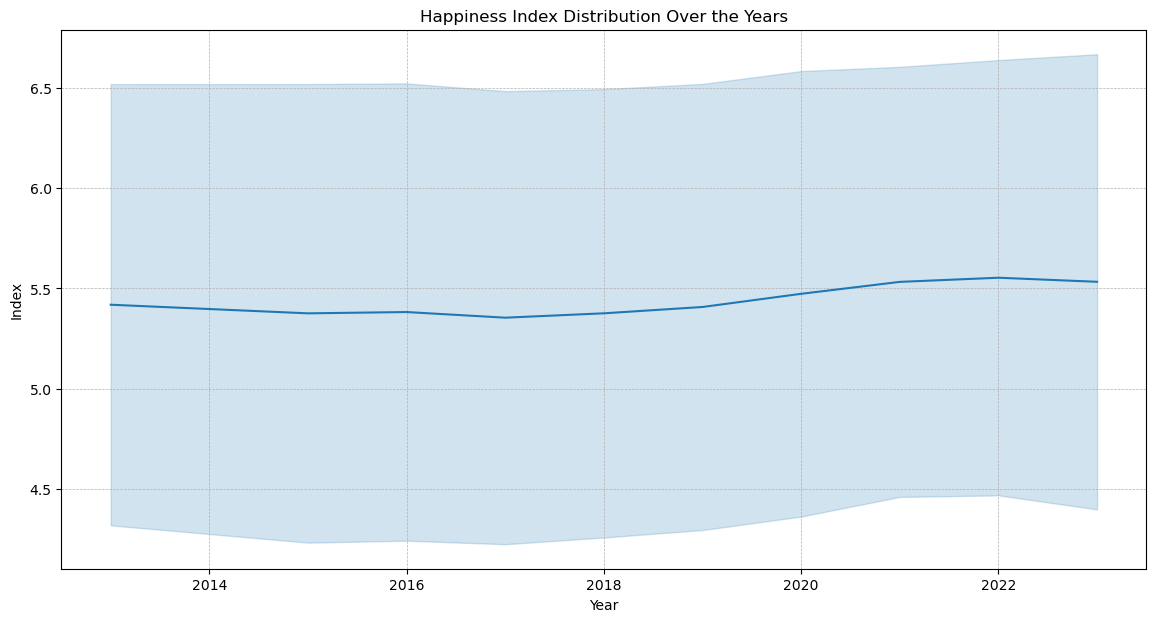

count    1523.000000
mean        5.438242
std         1.115623
min         1.859000
25%         4.594000
50%         5.425000
75%         6.258500
max         7.842000
Name: Index, dtype: float64

In [29]:
# Summary statistics for the 'Index' column
summary_stats = happiness_index['Index'].describe()

# Visualization of the happiness index distribution over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=happiness_index, x='Year', y='Index', ci='sd')
plt.title('Happiness Index Distribution Over the Years')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

summary_stats


## Visualize the top and bottom countries based on the happiness index for the latest year (2023).  the top 20 and bottom 20 countries.

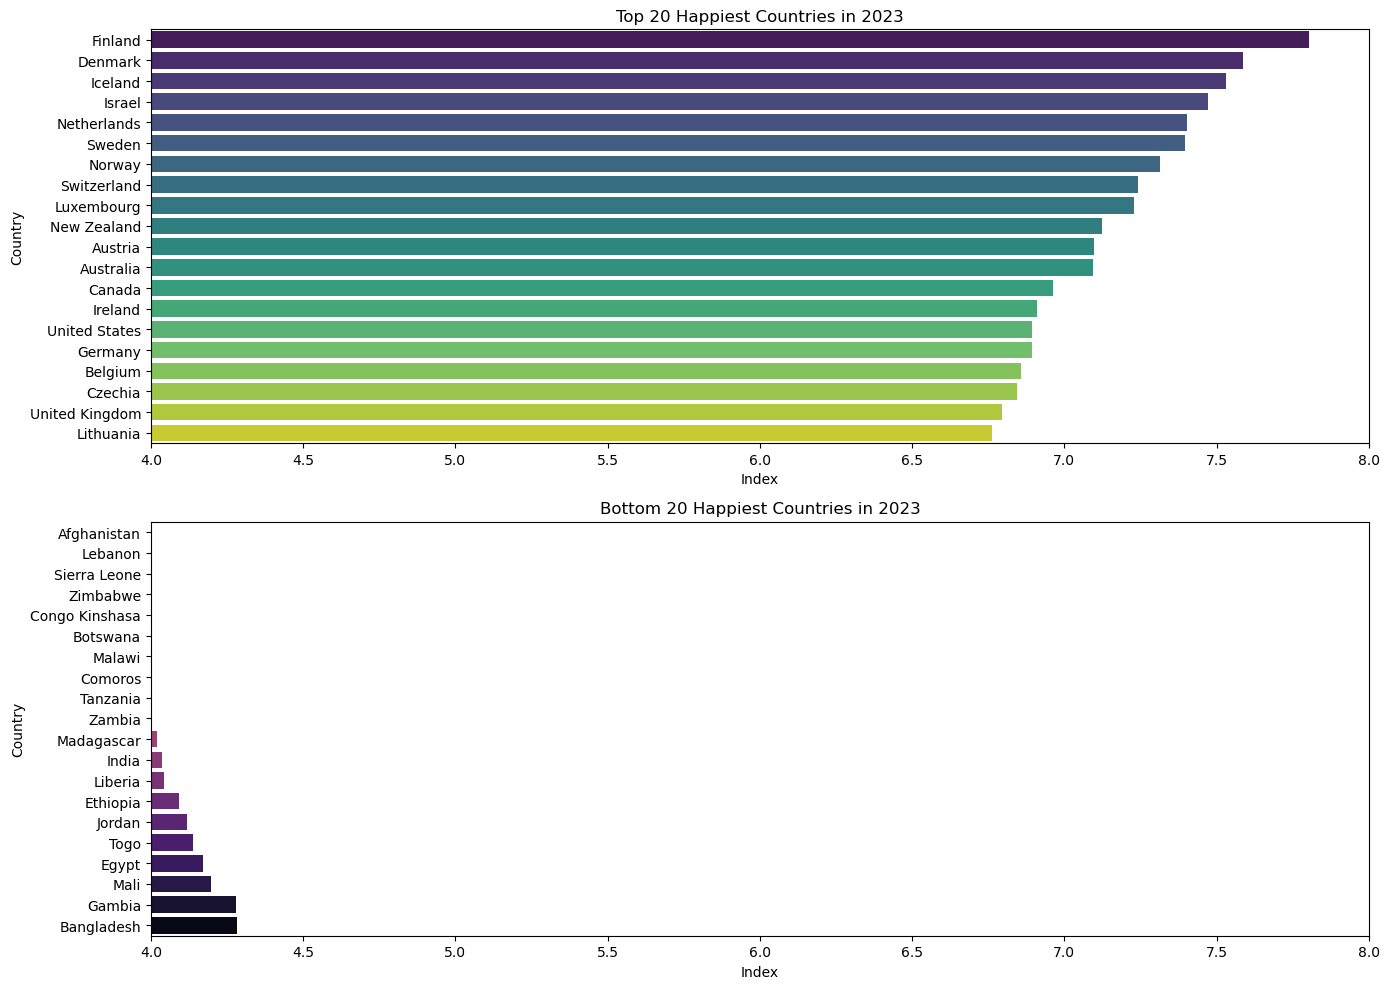

In [30]:
# Filtering data for the year 2023
data_2023 = happiness_index[happiness_index['Year'] == 2023]

# Sorting by happiness index and picking top and bottom 10 countries
top_20 = data_2023.sort_values(by='Index', ascending=False).head(20)
bottom_20 = data_2023.sort_values(by='Index', ascending=True).head(20)

# Visualization
plt.figure(figsize=(14, 10))

# Top 10 countries
plt.subplot(2, 1, 1)
sns.barplot(data=top_20, x='Index', y='Country', palette='viridis')
plt.title('Top 20 Happiest Countries in 2023')
plt.xlim(4, 8)

# Bottom 10 countries
plt.subplot(2, 1, 2)
sns.barplot(data=bottom_20, x='Index', y='Country', palette='magma_r')
plt.title('Bottom 20 Happiest Countries in 2023')
plt.xlim(4, 8)

plt.tight_layout()
plt.show()


# For Morocco

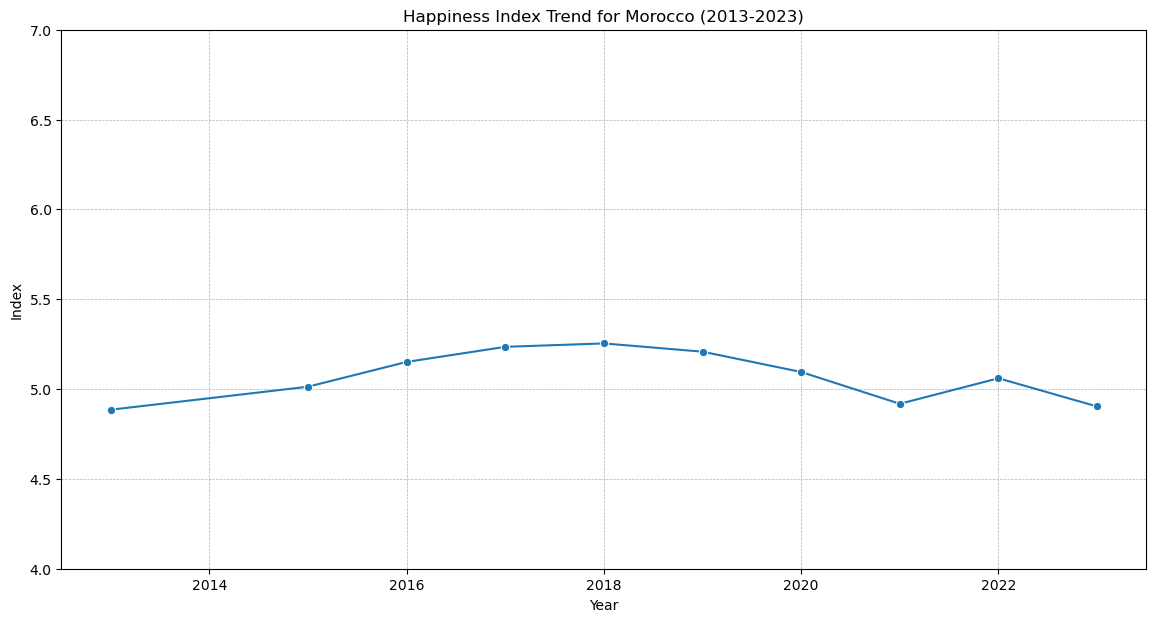

In [31]:
# Filtering data for Morocco
morocco_data = happiness_index[happiness_index['Country'] == 'Morocco']

# Visualization of happiness index trend for Morocco
plt.figure(figsize=(14, 7))
sns.lineplot(data=morocco_data, x='Year', y='Index', marker='o')
plt.title('Happiness Index Trend for Morocco (2013-2023)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(4, 7)
plt.show()


# Morocco's rank and happiness index value for the year 2023.

In [32]:
# Extracting Morocco's rank and happiness index for 2023
morocco_2023 = data_2023[data_2023['Country'] == 'Morocco'][['Rank', 'Index']].iloc[0]

morocco_2023


Rank     100.000
Index      4.903
Name: 1537, dtype: float64

# Compared how Morocco's happiness index has changed over the years in comparison to the global average.

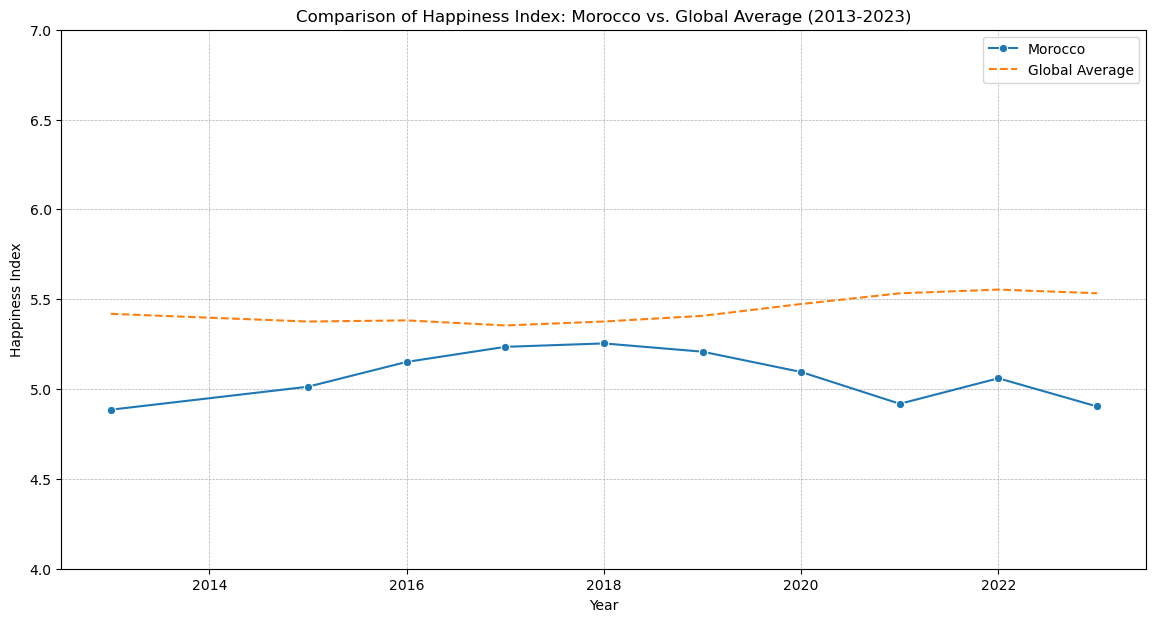

In [33]:
# Calculating the global average happiness index for each year
global_avg = happiness_index.groupby('Year')['Index'].mean().reset_index()

# Merging the global average with Morocco's data for comparison
comparison_data = pd.merge(morocco_data, global_avg, on='Year', how='left', suffixes=('_Morocco', '_Global'))

# Visualization
plt.figure(figsize=(14, 7))
sns.lineplot(data=comparison_data, x='Year', y='Index_Morocco', label='Morocco', marker='o')
sns.lineplot(data=comparison_data, x='Year', y='Index_Global', label='Global Average', linestyle='--')
plt.title('Comparison of Happiness Index: Morocco vs. Global Average (2013-2023)')
plt.ylabel('Happiness Index')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.ylim(4, 7)
plt.show()
